<a href="https://colab.research.google.com/github/lucyporte/GDSC/blob/main/Copy_of_Introduction_to_TensorFlow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import TensorFlow





In [ ]:
import tensorflow as tf

The first step here is going to be to select the correct version of TensorFlow from within collabratory!

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


###Creating Tensors
Below is an example of how to create some different tensors.

In [ ]:
string = tf.Variable("this is a string", tf.string) # tf.string here is the type of the data stored in the tensor
number = tf.Variable(324, tf.int16)      
floating = tf.Variable(3.567, tf.float64)

###Rank/Degree of Tensors
Another word for rank is degree, these terms simply mean the number of dimensions involved in the tensor. What we created above is a *tensor of rank 0*, also known as a scalar. 

In [ ]:
rank1_tensor = tf.Variable(["Test"], tf.string) 
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)

**To determine the rank** of a tensor we can call the following method.

In [ ]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

The rank of a tensor is direclty related to the deepest level of nested lists. You can see in the first example ```["Test"]``` is a rank 1 tensor as the deepest level of nesting is 1. 
Where in the second example ```[["test", "ok"], ["test", "yes"]]``` is a rank 2 tensor as the deepest level of nesting is 2.

###Slicing Tensors
You may be familiar with the term "slice" in python and its use on lists, tuples etc. Well the slice operator can be used on tensors to select specific axes or elements.

In [ ]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32) 

tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
# Now lets select some different rows and columns from our tensor

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3. 

row1 = tensor[0]  # selects the first row
print(row1)

column1 = tensor[:, 0]  # selects the first column
print(column1)

row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row_2_and_4)

column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


##Creating a Neural Network

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


###Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

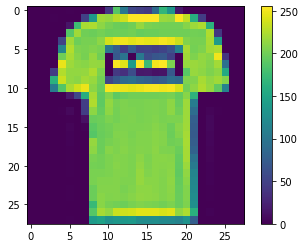

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values. 

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes.

###Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

##Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)